In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
from fastai.structured import apply_cats, proc_df
from fastai.column_data import *
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import dill as pickle

import numpy as np
np.set_printoptions(threshold=50, edgeitems=20)
data_path=Path('data/')
PATH = data_path

In [4]:
lb=LabelEncoder()
def LabelEncoding_Cat(df):
    df=df.copy()
    Cat_Var=df.select_dtypes('object').columns.tolist()
    for col in Cat_Var:
        df[col]=lb.fit_transform(df[col].astype('str'))
    return df    

def Fill_NA(df):
    df=df.copy()
    Num_Features=df.select_dtypes(['float64','int64']).columns.tolist()
    df[Num_Features]= df[Num_Features].fillna(123456789)
    return df


# Format and clean data

In [5]:
def read_csv(file_name):
    return pd.read_csv(data_path/file_name).pipe(LabelEncoding_Cat)

In [6]:
join_key = "SK_ID_CURR"

In [7]:
# bureau = (pd.read_csv(data_path/"bureau_balance.csv")
#          .pipe(LabelEncoding_Cat))

# cred_card_bal = (pd.read_csv(data_path/"credit_card_balance.csv")
#                .pipe(LabelEncoding_Cat))

# pos_cash_bal = (pd.read_csv(data_path/"POS_CASH_balance.csv")
#                .pipe(LabelEncoding_Cat))
               
# prev = (pd.read_csv(data_path/"previous_application.csv") 
#                .pipe(LabelEncoding_Cat))


In [8]:
bureau = read_csv("bureau_balance.csv")
cred_card_bal = read_csv("credit_card_balance.csv")
pos_cash_bal = read_csv("POS_CASH_balance.csv")
prev = read_csv("previous_application.csv")

In [9]:
application_train = read_csv("application_train.csv")

In [10]:
application_test = read_csv("application_test.csv")

# dropping features with small variance

In [11]:
features_with_small_variance = application_train.columns[(application_train.std(axis = 0) < .01).values]
application_train[features_with_small_variance].describe().T

,count,mean,std,min,25%,50%,75%,max
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_DOCUMENT_2,307511.0,0.000042,0.006502,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_4,307511.0,0.000081,0.009016,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_10,307511.0,0.000023,0.004771,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_12,307511.0,0.000007,0.002550,0.0,0.0,0.0,0.0,1.0


In [12]:
remove_features = [    
    'FLAG_MOBIL',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_12',
]

In [13]:
features_with_small_variance = application_test.columns[(application_test.std(axis = 0) < .01).values]
application_test[features_with_small_variance].describe().T

,count,mean,std,min,25%,50%,75%,max
FLAG_MOBIL,48744.0,0.999979,0.004529,0.0,1.0,1.0,1.0,1.0
FLAG_DOCUMENT_2,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_7,48744.0,0.000041,0.006405,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_10,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_12,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_13,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_14,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_15,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_16,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_DOCUMENT_17,48744.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
application_train.drop(features_with_small_variance, axis = 1, inplace = True)
application_test.drop(features_with_small_variance, axis = 1, inplace = True)
print(application_train.shape, application_test.shape)

(307511, 109) (48744, 108)


In [15]:
list(features_with_small_variance)

['FLAG_MOBIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [16]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1,1730.430,17145.0,17145.0,0.0,17145.0,2,15,...,2,12.0,4,13,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,0,25188.615,607500.0,679671.0,NaN,607500.0,4,11,...,10,36.0,2,7,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,0,15060.735,112500.0,136444.5,NaN,112500.0,5,11,...,10,12.0,1,6,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,0,47041.335,450000.0,470790.0,NaN,450000.0,1,7,...,10,12.0,4,8,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,0,31924.395,337500.0,404055.0,NaN,337500.0,4,9,...,10,24.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
len(prev)

1670214

In [18]:
joined_df = pd.merge(application_train, prev, how='left', on=join_key)

In [19]:
len(application_train)

307511

In [20]:
len(joined_df)

1430155

In [21]:
joined_df.loc[joined_df['SK_ID_CURR'] == 271877]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
686691,271877,0,0,0,0,1,1,225000.0,533668.5,25803.0,...,2.0,12.0,4.0,13.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
686692,271877,0,0,0,0,1,1,225000.0,533668.5,25803.0,...,5.0,36.0,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
686693,271877,0,0,0,0,1,1,225000.0,533668.5,25803.0,...,5.0,12.0,4.0,11.0,365243.0,-512.0,-182.0,-392.0,-387.0,0.0


In [22]:
len(application_test.columns)

108

In [23]:
set(application_train.columns) - set(application_test.columns)

{'TARGET'}

In [24]:
# joined_df1 = pd.merge(application_train, prev, on=['SK_ID_CURR', 'SK_ID_PREV'])

In [25]:
len(application_train.columns)

109

In [26]:
len(application_train)

307511

In [27]:
len(joined_df.columns)

145

In [28]:
len(joined_df)

1430155

In [29]:
pos_cash_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,0,0,0
1,1715348,367990,-33,36.0,35.0,0,0,0
2,1784872,397406,-32,12.0,9.0,0,0,0
3,1903291,269225,-35,48.0,42.0,0,0,0
4,2341044,334279,-35,36.0,35.0,0,0,0


In [30]:
cred_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,0,0,0


In [31]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
bureau.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,6
1,5715448,-1,6
2,5715448,-2,6
3,5715448,-3,6
4,5715448,-4,6


In [33]:
# cred_card_bal.head()

In [34]:
# pos_cash_bal.head()

In [35]:
# prev.head()

In [36]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# application_test.sample(20)['HOUSETYPE_MODE']

In [38]:
list(application_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

In [39]:
application_train.columns.to_series().groupby(application_train.dtypes).groups

{dtype('int64'): Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
        'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
        'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
        'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',

In [40]:
samp_size = len(application_train)

In [41]:
train_ratio  = 0.75
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(application_train)))

In [42]:
val_idx[:10]

[230633,
 230634,
 230635,
 230636,
 230637,
 230638,
 230639,
 230640,
 230641,
 230642]

In [43]:
type_vars = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

discrete_vars = [
    "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", 
    "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", 
    "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", 
    "HOUR_APPR_PROCESS_START", "ORGANIZATION_TYPE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "REGION_RATING_CLIENT", 
    "REGION_RATING_CLIENT_W_CITY", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", 
    "FLAG_PHONE", "FLAG_EMAIL", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", 
    "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", 
    "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", 
    "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", 
    "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", 
    "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", 
    "FONDKAPREMONT_MODE", "HOUSETYPE_MODE"
]

cat_vars = list(set(discrete_vars) - set(features_with_small_variance))

# Process

In [44]:
contin_vars = list((set(application_train.columns) - set(cat_vars)) - set(["TARGET"]))

In [45]:
application_train["TARGET"] = application_train["TARGET"].fillna(0).astype('int')

In [46]:
# len(list(set(application_train.columns) - set("TARGET")))
len(list(set(application_train.columns) - set(["TARGET"])))

108

In [47]:
train_df = application_train[list(set(application_train.columns) - set(["TARGET"]))]
y = application_train["TARGET"]

In [48]:
for v in contin_vars:
    application_test[v] = application_test[v].fillna(0).astype('float32')
    application_train[v] = application_train[v].fillna(0).astype('float32')
    train_df[v] = train_df[v].fillna(0).astype('float32')

/home/cheeseblubber/anaconda3/envs/fastai-latest/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [49]:
for col in cat_vars:
    application_test[col] = application_test[col].astype('category')
    application_train[col] = application_train[col].astype('category')
    train_df[col] = train_df[col].astype('category')    

application_train['TARGET'] = application_train['TARGET'].astype('category')

/home/cheeseblubber/anaconda3/envs/fastai-latest/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
cat_sz = [(c, len(application_train[c].cat.categories)+1) for c in cat_vars]

In [51]:
apply_cats(application_test, application_train)

In [52]:
len(cat_sz)

38

In [53]:
cat_sz

[('WALLSMATERIAL_MODE', 9),
 ('OCCUPATION_TYPE', 20),
 ('NAME_CONTRACT_TYPE', 3),
 ('REGION_RATING_CLIENT_W_CITY', 4),
 ('FLAG_DOCUMENT_3', 3),
 ('NAME_FAMILY_STATUS', 7),
 ('HOUR_APPR_PROCESS_START', 25),
 ('LIVE_CITY_NOT_WORK_CITY', 3),
 ('FLAG_DOCUMENT_11', 3),
 ('FLAG_DOCUMENT_18', 3),
 ('NAME_EDUCATION_TYPE', 6),
 ('FLAG_DOCUMENT_6', 3),
 ('FLAG_PHONE', 3),
 ('FLAG_WORK_PHONE', 3),
 ('FLAG_EMAIL', 3),
 ('REG_REGION_NOT_WORK_REGION', 3),
 ('NAME_HOUSING_TYPE', 7),
 ('LIVE_REGION_NOT_WORK_REGION', 3),
 ('FLAG_DOCUMENT_4', 3),
 ('FLAG_OWN_REALTY', 3),
 ('REG_CITY_NOT_LIVE_CITY', 3),
 ('FLAG_DOCUMENT_9', 3),
 ('FLAG_EMP_PHONE', 3),
 ('FLAG_CONT_MOBILE', 3),
 ('FLAG_DOCUMENT_8', 3),
 ('REGION_RATING_CLIENT', 4),
 ('FLAG_OWN_CAR', 3),
 ('EMERGENCYSTATE_MODE', 4),
 ('NAME_TYPE_SUITE', 9),
 ('NAME_INCOME_TYPE', 9),
 ('FLAG_DOCUMENT_5', 3),
 ('REG_REGION_NOT_LIVE_REGION', 3),
 ('REG_CITY_NOT_WORK_CITY', 3),
 ('FONDKAPREMONT_MODE', 6),
 ('CODE_GENDER', 4),
 ('ORGANIZATION_TYPE', 59),
 ('WEE

In [54]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [55]:
train_df, y, nas = proc_df(application_train, "TARGET")

In [56]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0], dtype=int8)

In [57]:
test_df, _, _ = proc_df(application_test)

In [58]:
bs = 250

In [59]:
y[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [60]:
# len(df.columns) - len(cat_vars)

In [61]:
len(application_train.columns) - len(cat_vars)

71

# Throwing away data ATM
Incorporate data from other tables

In [62]:
test_df = test_df[train_df.columns]

# Train

In [6]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())


In [7]:
train_df.to_feather(f'{PATH}train_df')
test_df.to_feather(f'{PATH}test_df')

NameError: name 'train_df' is not defined

In [8]:
pickle.dump(val_idx, open(f'{PATH}val_idx','wb'))

NameError: name 'val_idx' is not defined

In [77]:
pickle.dump(y, open(f'{PATH}y','wb'))
pickle.dump(emb_szs, open(f'{PATH}emb_szs','wb'))
pickle.dump(cat_vars, open(f'{PATH}cat_vars','wb'))

In [61]:
from fastai.structured import apply_cats, proc_df
from fastai.column_data import *
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import dill as pickle
from sklearn.metrics import roc_curve, auc

import numpy as np
np.set_printoptions(threshold=50, edgeitems=20)
data_path=Path('data/')
PATH = data_path

In [3]:
train_df = pd.read_feather(f'{PATH}train_df')
test_df = pd.read_feather(f'{PATH}test_df')

In [4]:
val_idx = pickle.load(open(f'{PATH}val_idx','rb'))
cat_vars = pickle.load(open(f'{PATH}cat_vars','rb'))
emb_szs = pickle.load(open(f'{PATH}emb_szs','rb'))

In [5]:
y = pickle.load(open(f'{PATH}y','rb'))

In [6]:
y.shape

(307511,)

In [7]:
md = ColumnarModelData.from_data_frame(
    PATH, val_idx, train_df, y.astype(np.int32), 
    cat_flds=cat_vars, bs=128, is_reg=False, test_df=test_df,
    is_multi=False
)

In [8]:
y_range = (0, 1)

In [9]:
m = md.get_learner(emb_szs, len(train_df.columns)-len(cat_vars),
                   0.04, 2, [200,50], drops=[0.1, 0.05])

In [10]:
m.lr_find()

 60%|█████▉    | 1076/1802 [00:08<00:05, 131.28it/s, loss=18.3]   


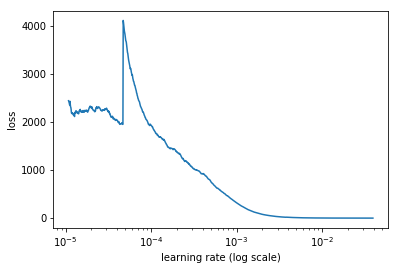

In [11]:
m.sched.plot()

In [12]:
lr = 1e-3

In [13]:
m.fit(lr, 2)

epoch      trn_loss   val_loss                                   
    0      0.338977   0.283035  
    1      0.31833    0.277953                                  



[array([0.27795])]

In [14]:
m.fit(lr/10, 1)

epoch      trn_loss   val_loss                                  
    0      0.289455   0.277958  



[array([0.27796])]

In [15]:
m.fit(lr/10, 2, 2)

epoch      trn_loss   val_loss                                  
    0      0.294797   0.283608  
    1      0.295317   0.276143                                  



[array([0.27614])]

In [16]:
m.fit(lr/10, 2, 2)

epoch      trn_loss   val_loss                                  
    0      0.286023   0.283942  
    1      0.286444   0.280578                                  



[array([0.28058])]

In [20]:
m.fit(lr/100, 2, 2)

epoch      trn_loss   val_loss                                  
    0      0.281111   0.279469  
    1      0.30047    0.279673                                  



[array([0.27967])]

In [60]:
m.fit(lr/100, 2, 5)

epoch      trn_loss   val_loss                                  
    0      0.284594   0.279959  
    1      0.277483   0.279631                                  



[array([0.27963])]

In [21]:
m.save('val0')

In [22]:
m.load('val0')

# Eval

In [32]:
x1,y1=m.predict_with_targs()

In [33]:
pred_test=m.predict(True)

In [41]:
pred_test1=m.predict(True)

In [43]:
np.exp(pred_test1)

array([[0.87924, 0.12076],
       [0.82793, 0.17207],
       [0.9178 , 0.0822 ],
       [0.97836, 0.02164],
       [0.91002, 0.08998],
       [0.94203, 0.05797],
       [0.88247, 0.11753],
       [0.85327, 0.14673],
       [0.91375, 0.08625],
       [0.83292, 0.16708],
       [0.92627, 0.07373],
       [0.84667, 0.15333],
       [0.88639, 0.11361],
       [0.85384, 0.14616],
       [0.856  , 0.144  ],
       [0.8639 , 0.1361 ],
       [0.88851, 0.11149],
       [0.92442, 0.07558],
       [0.89245, 0.10755],
       [0.89268, 0.10732],
       ...,
       [0.87328, 0.12672],
       [0.86288, 0.13712],
       [0.94214, 0.05786],
       [0.86535, 0.13465],
       [0.93913, 0.06087],
       [0.82522, 0.17478],
       [0.89035, 0.10965],
       [0.93491, 0.06509],
       [0.90404, 0.09596],
       [0.93205, 0.06795],
       [0.9199 , 0.0801 ],
       [0.9378 , 0.0622 ],
       [0.9355 , 0.0645 ],
       [0.91575, 0.08425],
       [0.85753, 0.14247],
       [0.86165, 0.13835],
       [0.898  ,

In [34]:
# WHY EXP
pred_test = np.exp(pred_test)
pred_test

array([[0.87924, 0.12076],
       [0.82793, 0.17207],
       [0.9178 , 0.0822 ],
       [0.97836, 0.02164],
       [0.91002, 0.08998],
       [0.94203, 0.05797],
       [0.88247, 0.11753],
       [0.85327, 0.14673],
       [0.91375, 0.08625],
       [0.83292, 0.16708],
       [0.92627, 0.07373],
       [0.84667, 0.15333],
       [0.88639, 0.11361],
       [0.85384, 0.14616],
       [0.856  , 0.144  ],
       [0.8639 , 0.1361 ],
       [0.88851, 0.11149],
       [0.92442, 0.07558],
       [0.89245, 0.10755],
       [0.89268, 0.10732],
       ...,
       [0.87328, 0.12672],
       [0.86288, 0.13712],
       [0.94214, 0.05786],
       [0.86535, 0.13465],
       [0.93913, 0.06087],
       [0.82522, 0.17478],
       [0.89035, 0.10965],
       [0.93491, 0.06509],
       [0.90404, 0.09596],
       [0.93205, 0.06795],
       [0.9199 , 0.0801 ],
       [0.9378 , 0.0622 ],
       [0.9355 , 0.0645 ],
       [0.91575, 0.08425],
       [0.85753, 0.14247],
       [0.86165, 0.13835],
       [0.898  ,

In [38]:
pred_test[:,0]

array([0.87924, 0.82793, 0.9178 , 0.97836, 0.91002, 0.94203, 0.88247, 0.85327, 0.91375, 0.83292, 0.92627,
       0.84667, 0.88639, 0.85384, 0.856  , 0.8639 , 0.88851, 0.92442, 0.89245, 0.89268, ..., 0.87328,
       0.86288, 0.94214, 0.86535, 0.93913, 0.82522, 0.89035, 0.93491, 0.90404, 0.93205, 0.9199 , 0.9378 ,
       0.9355 , 0.91575, 0.85753, 0.86165, 0.898  , 0.89325, 0.91071, 0.86508], dtype=float32)

(array([ 200., 1456., 4245., 6646., 7659., 6996., 9273., 8716., 2439., 1114.]),
 array([0.77854, 0.80069, 0.82283, 0.84498, 0.86713, 0.88927, 0.91142, 0.93356, 0.95571, 0.97785, 1.     ]),
 <a list of 10 Patch objects>)

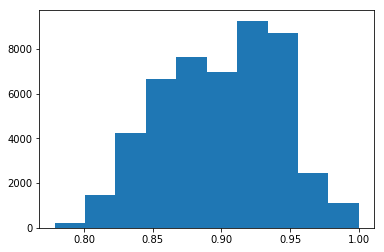

In [39]:
matplotlib.pyplot.hist(pred_test[:,0])

In [40]:
pred_test[:,0]

array([0.87924, 0.82793, 0.9178 , 0.97836, 0.91002, 0.94203, 0.88247, 0.85327, 0.91375, 0.83292, 0.92627,
       0.84667, 0.88639, 0.85384, 0.856  , 0.8639 , 0.88851, 0.92442, 0.89245, 0.89268, ..., 0.87328,
       0.86288, 0.94214, 0.86535, 0.93913, 0.82522, 0.89035, 0.93491, 0.90404, 0.93205, 0.9199 , 0.9378 ,
       0.9355 , 0.91575, 0.85753, 0.86165, 0.898  , 0.89325, 0.91071, 0.86508], dtype=float32)

In [98]:
res = predict_with_targs_(m.model, md.test_dl)

In [101]:
np.concatenate(res[0])

array([[-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       ...,
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
       [-0.08449, -2.5131 ],
  

In [59]:
a1, b1 = np.concatenate(a), np.concatenate(b)

In [90]:
data  = list(iter(md.test_dl))

In [88]:
d

()

In [84]:
single_batch[0].shape

torch.Size([128, 38])

In [ ]:
test_df['TARGET']=pred_test

In [52]:
test_df['TARGET']=pred_test[:,1]

In [53]:
csv_fn=f'{PATH}/tmp/sub.csv'

In [57]:
test_df['SK_ID_CURR'] = test_df['SK_ID_CURR'].astype(int)

In [58]:
test_df[['SK_ID_CURR','TARGET']].to_csv(csv_fn, index=False)

In [59]:
FileLink(csv_fn)

/home/cheeseblubber/workspace/competition/home-default-credit/data/tmp/sub.csv

In [ ]:
# zero_pred = {ele[1]:0.0  for ele in ids}

In [ ]:
# with open('dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in zero_pred.items():
#        writer.writerow([key, value])
